# Multiclass neural

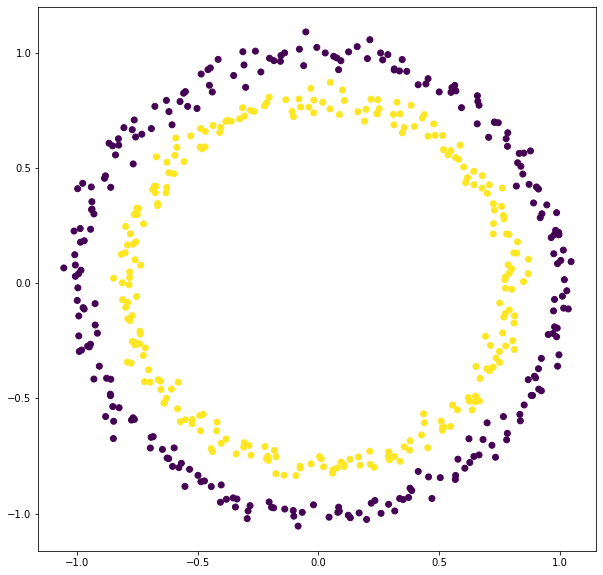

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets        import make_circles
from sklearn.model_selection import train_test_split
from sklearn.metrics         import confusion_matrix

np.random.seed(42)
N = 500
C,c = make_circles(N, random_state=42, noise=0.03) 
plt.figure(figsize=(10,10))
plt.scatter(C[:,0],C[:,1],c=c)

#cat_images = np.random.randn(700, 2) + np.array([0, -3])
#mouse_images = np.random.randn(700, 2) + np.array([3, 3])
#dog_images = np.random.randn(700, 2) + np.array([-3, 3])
#
#feature_set = np.vstack([cat_images, mouse_images, dog_images])
#
#labels = np.array([0]*700 + [1]*700 + [2]*700)
#
#one_hot_labels = np.zeros((2100, 3))

one_hot = np.zeros((N,2))
for i in range(N):
    one_hot[i, c[i]] = 1

plt.show()

## One hot encoding

Los estímulos son codificados para mostrar un 1 en entrada correspondiente a su valor. Ejemplo

$ 2 = [0,0,1]$

Es un vector de probabilidad en la que la clase i-ésima tiene una probabilidad de aparición $p(i)$.

In [46]:
print(one_hot)

[[0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 

In [47]:
Ct, Cp, ct, cp = train_test_split(C,one_hot)

## Softmax

Ahora no solo queremos un valor entre 0 y 1, sino que queremos un vector en el que la salida deseada marque un 1 y las demás 0 (o algo cercano en ambos casos). Es decir no podemos usar $n$ sigmoides porque el valor de cada entrada está condicionada a ser 1 solo si las demás dan 0. 

Esto se puede lograr con la función softmax que nos da la probabilidad $i$-ésima de cada entrada en el vector aleatorio $x$. Función que generaliza a sigmoide. Arroja un vector aleatoria donde cada entrada es la probabilidad de observar la clase en esa entrada, su suma debe dar 1.



$$p_i = \frac {\exp(x_i)} {\sum_{j}^{N} {\exp(x_j)}}$$

### Cross-entropy

Pero ahora no podemos usar el MSE (ni MAE) como nuestra función de error, debemos usar algo que nos permita ponderar el error de haberle 'atinado' a la entrada deseada con un 1, y con un 0 a las demás.

Cross-entropy es la función que generaliza a la función que usamos para el caso binario.

$$CE = \sum_i^{N} y_i log(x_i) $$

In [48]:
def sigmoide(x):
    return 1/(1+np.exp(-x))

def dsigmoide(y):
    #return y*(1-y)
    return sigmoid(y) *(1-sigmoid (y))

def softmax(A):
    expA = np.exp(A)
    return expA / expA.sum(axis=1, keepdims=True)

costo = lambda t, y: np.sum(-t * np.log(y))

def predict(M, b, X):
    wh, wo = M
    bh, bo = b
    
    zh = np.dot(X, wh) + bh
    ah = sigmoide(zh)

    # Salida
    zo = np.dot(ah, wo) + bo
    ao = softmax(zo)
    return ao

    

## Definición de red

Definimos los metaparámetros de la red.

In [49]:
n = 2
escondidas = 5
m = 2

# Una alternativa equivalente en vez de ocupar una 
# dimensión extra es la de ocupar una transformación afin
# esencialmente y = mx + b
# el proceso de optimizacion debe optimizar (m,b)

wh = np.random.rand(n,escondidas)
bh = np.random.randn(escondidas)

wo = np.random.rand(escondidas,m)
bo = np.random.randn(m)
iters = int(5e4)                   # numero de iteraciones
lr = 10e-4                         # constante de aprendizaje


## Entrenamos

In [51]:

def entrena(X,y, M, b, iters, lr, dim_in, dim_out, N, step=1000):
    """
    Entrenamiento 
    X conjunto de entrenamiento
    y etiquetas 
    iters:   numero de iteraciones
    lr:      constante de aprendizaje
    dim_in:  dimension del conjunto de entrada (Rn)
    dim_out: dimension del vector de salida (Rm)
    N:       num instancias |X|
    M, b:    [wh, wo], [bh, bo]
    """
    errores = []
    ############# desempacamos los pesos
    wh, wo = M
    bh, bo = b
    
    for epoca in range(iters):
    ############# feedforward

        # Escondidas
        zh = np.dot(X, wh) + bh
        ah = sigmoide(zh)

        # Salida
        zo = np.dot(ah, wo) + bo
        ao = softmax(zo)

    ########## Backpropagation

    ########## Deltas en salida

        dcost_dzo = ao - y
        dzo_dwo = ah

        dcost_wo = np.dot(dzo_dwo.T, dcost_dzo)

        dcost_bo = dcost_dzo
 
    
        dzo_dah = wo
        dcost_dah = np.dot(dcost_dzo , dzo_dah.T)
        dah_dzh = dsigmoide(zh)
        dzh_dwh = X
        dcost_wh = np.dot(dzh_dwh.T, dah_dzh * dcost_dah)

        dcost_bh = dcost_dah * dah_dzh

        # Actualizacion de pesos
        
        wh -= lr * dcost_wh
        bh -= lr * dcost_bh.sum(axis=0)

        wo -= lr * dcost_wo
        bo -= lr * dcost_bo.sum(axis=0)

        if (epoca % step == 0):
            loss = costo(y,ao)
            print('Loss function value: ', loss)
            errores.append(loss)
            
    return [wh,wo], [bh,bo], errores

M, b, J = entrena(Ct, ct, [wh, wo], [bh, bo], iters, lr, n, m, N)

Loss function value:  298.825525885567
Loss function value:  258.41292256029305
Loss function value:  248.88672145701074
Loss function value:  187.28093054945748
Loss function value:  116.34791314282583
Loss function value:  63.26062398798025
Loss function value:  44.83349363721035
Loss function value:  36.32809397268278
Loss function value:  31.176806550972746
Loss function value:  27.620327771232738
Loss function value:  24.97366542822275
Loss function value:  22.90291592695597
Loss function value:  21.22322961958838
Loss function value:  19.823705757144264
Loss function value:  18.633605359808513
Loss function value:  17.605416091291183
Loss function value:  16.705790868149755
Loss function value:  15.910447567299979
Loss function value:  15.201160847829447
Loss function value:  14.563907015588349
Loss function value:  13.987671719483103
Loss function value:  13.463654812622073
Loss function value:  12.984722699916432
Loss function value:  12.545020501190034
Loss function value:  12

## Evaluamos

Vamos a analizar la evolución de la función de costo y la matriz de confusión

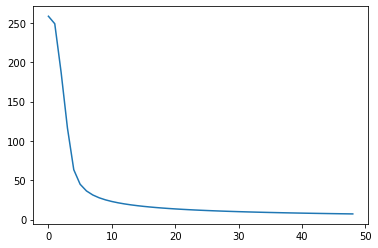

In [64]:
plt.plot(J[1:])

In [63]:
yp = np.round(predict(M,b,Cp))
confusion_matrix(np.argmax(yp, axis=1), np.argmax(cp, axis=1))

array([[61,  0],
       [ 0, 64]])

## Visualizamos

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  app.launch_new_instance()


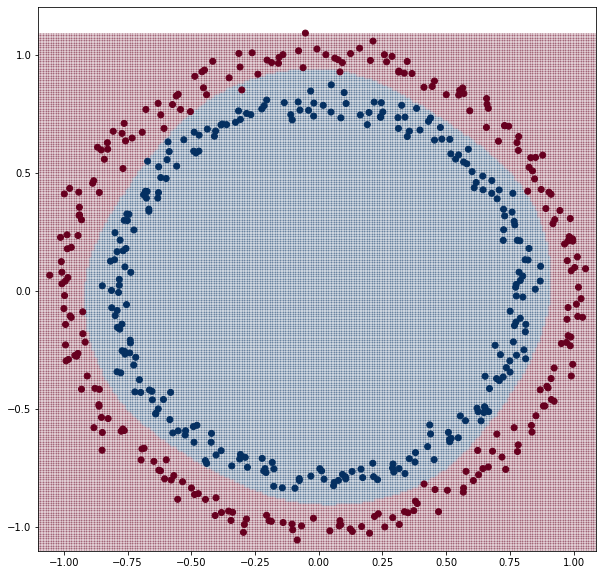

In [68]:
h = 0.01
P = np.arange(-1-.1,1+.1,h)
Q = np.arange(-1-.1,1+.1,h)
Z = np.zeros((len(P), len(Q)))


fig = plt.figure(figsize=(10,10))
for p in range(len(P)):
    for q in range(len(Q)):
        x,y = P[p], Q[q]
        sc = predict(M,b,np.array([[x,y]]))
        #print(sc)
        Z[p,q] = np.argmax(sc)
        
cm = plt.cm.RdBu
plt.pcolor(P,Q,Z, cmap=cm, alpha=0.2)
plt.scatter(C[:,0],C[:,1],c=c, cmap = cm)